# A Machine Learning Approach To Classifying Credit Score
The credit score of a person determines the creditworthiness of the person. It helps financial companies determine if you can repay the loan or credit you are applying for. Today banks and credit card companies use Machine Learning algorithms to classify all the customers in their database based on their credit history.

There are three credit scores that banks and credit card companies use to label their customers:

- Good
- Standard
- Poor

A healthy credit score will ease the process of getting a loan or credit card for the person applying for it.

## The Project:
Hence, in this project, I will be building an ML model based on Random Forest to help classify credit score of an individual based on several different factors that contribute to the score. The final classification will be:

- Good
- Standard
- Poor

For this project, I will be using a dataset from <a href="https://statso.io/credit-score-classification-case-study/" target="_blank">Kaggle</a> submitted by <a href="https://www.kaggle.com/parisrohan" target="_blank">Rohan Paris</a>.

## The Dataset:
Before diving right into the project it is important to understand the dataset being dealt with. The dataset contains info about different customers as follows:

1. ID: Unique ID of the record
2. Customer_ID: Unique ID of the customer
3. Month: Month of the year
4. Name: The name of the person
5. Age: The age of the person
6. SSN: Social Security Number of the person
7. Occupation: The occupation of the person
8. Annual_Income: The Annual Income of the person
9. Monthly_Inhand_Salary: Monthly in-hand salary of the person
10. Num_Bank_Accounts: The number of bank accounts of the person
11. Num_Credit_Card: Number of credit cards the person is having
12. Interest_Rate: The interest rate on the credit card of the person
13. Num_of_Loan: The number of loans taken by the person from the bank
14. Type_of_Loan: The types of loans taken by the person from the bank
15. Delay_from_due_date: The average number of days delayed by the person from the date of payment
16. Num_of_Delayed_Payment: Number of payments delayed by the person
17. Changed_Credit_Card: The percentage change in the credit card limit of the person
18. Num_Credit_Inquiries: The number of credit card inquiries by the person
19. Credit_Mix: Classification of Credit Mix of the customer
20. Outstanding_Debt: The outstanding balance of the person
21. Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
22. Credit_History_Age: The age of the credit history of the person
23. Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
24. Total_EMI_per_month: The total EMI per month of the person
25. Amount_invested_monthly: The monthly amount invested by the person
26. Payment_Behaviour: The payment behaviour of the person
27. Monthly_Balance: The monthly balance left in the account of the person
28. Credit_Score: The credit score of the person

## Import Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('whitegrid')

## Import and Visualise Data
First let's import the data as a pandas Dataframe and have a look at it.

In [2]:
data = pd.read_csv('credit_score_data.csv')
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


## Data Validation

### Remove Unnecessary Columns
We can see there are 100000 rows of data spread along 28 columns. However, not all of these columns are necessary for our analysis or model building, and so, we may remove them before proceeding any further.

In [3]:
data = data.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)
data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### Check for Data Types
Next, we should look at the inferred data types of each of the column to check if they are correct for our analysis.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

We can see that the data types are correct for now - numerical columns have been turned into floats and categorical ones into object.

### Check for Missing Values
Before moving forward, let’s have a look if the dataset has any null values or not as they tend to disrupt the analysis and model building.

In [5]:
data.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

This is great! There are no missing values present in our dataset. Therefore, we don't have to worry about handling them.

### Check for Duplicated Data
Next, we should check if there are duplicated rows in our dataset. Duplicates don't provide the correct picture of the dataset and may be biased. Moreover, they cause an ML model to overfit and learn the random noise rather than the general patterns in the dataset. Hence, we should remove any duplicated data.

In [8]:
data.duplicated().sum()

0

We can see there are no duplicate rows in our dataset, so we do not need to drop any data.

### Check for Dataset Imbalance
As our final step in data validation, we need to check our dataset is balanced. That is, if there are equal no. of observations in each of the classes labelled in our dataset. Class imbalance can cause bias and lead to inaccurate ML models.

In [9]:
data['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

We can see there is a huge class imbalance in the dataset. More than 50% of the observations belong to the 'Standard' score, almost 30% to 'Poor' and the rest to 'Good'. This will indeed be a problem down the road, and we would need to balance the dataset before training an ML model on it.

## Exploratory Data Analysis (EDA)
EDA is a crucial step in data analysis as it tells us about the underlying hidden patterns in the dataset that can aid further advanced analysis or model building.

Our dataset has many features that can train a Machine Learning model for credit score classification. Let’s explore all the features one by one.

### Occupation vs. Credit Score
I will start by exploring the occupation feature to know if the occupation of the person affects credit scores

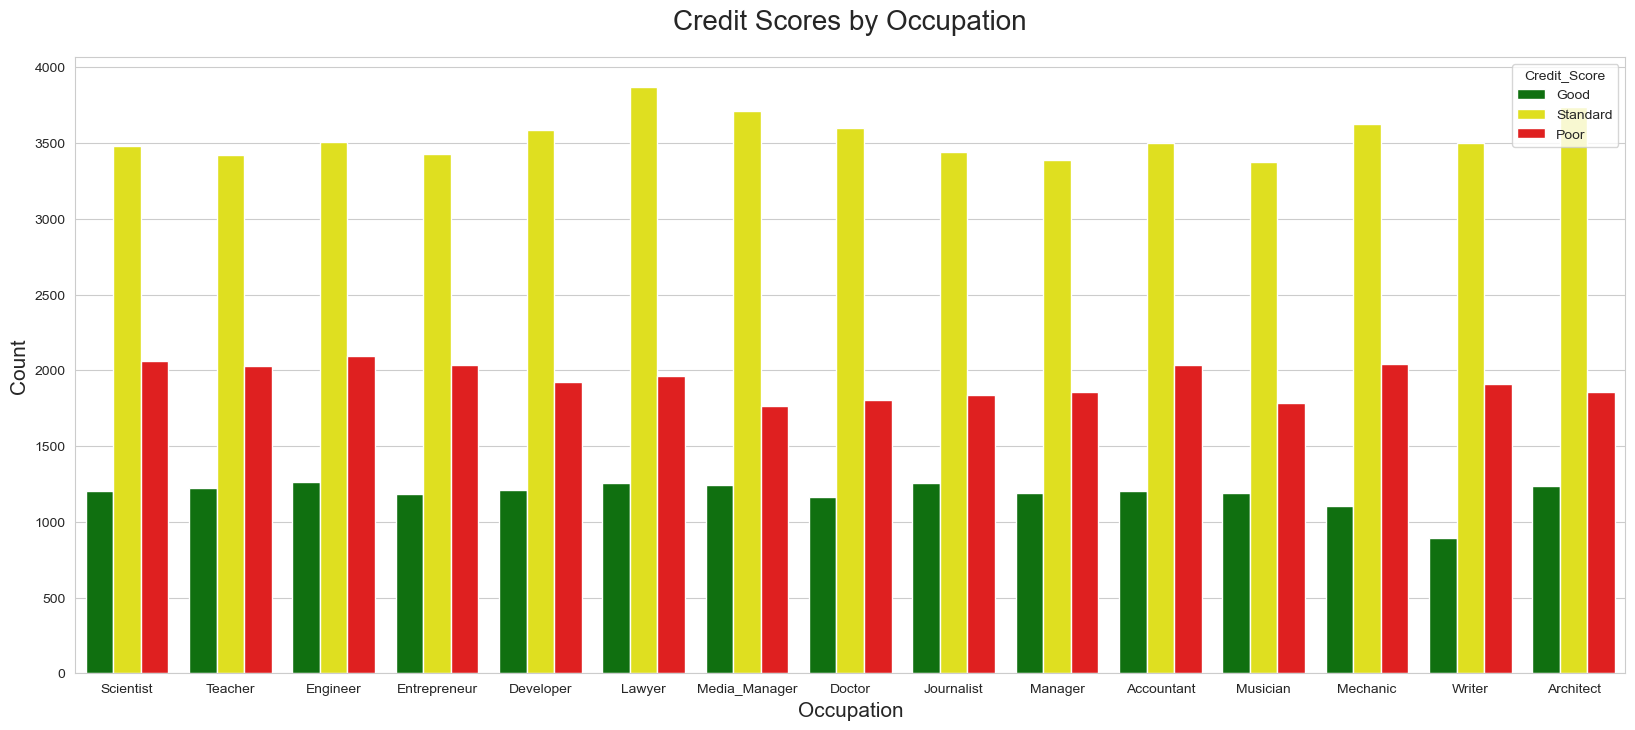

In [36]:
plt.figure(figsize=(20,8))

sns.countplot(data=data, x='Occupation', hue='Credit_Score', palette=['green', 'yellow', 'red'])
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Credit Scores by Occupation', fontsize=20, pad=20)
plt.show()

From the graph, there's no explicit trend between credit scores and occupation, as their distribution is quite similar to each other.